In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

La Red Automática de Monitoreo Atmosférico (RAMA) es el subsistema del Sistema de Monitoreo Atmosférico de la Ciudad de México (SIMAT) que realiza mediciones continuas y permanentes minuto a minuto de ozono (O3), dióxido de azufre (SO2), óxidos de nitrógeno (NOx), monóxido de carbono (CO), partículas menores a 10 micrómetros (PM10) y partículas menores a 2.5 micrómetros (PM2.5).

https://datos.cdmx.gob.mx/dataset/red-automatica-de-monitoreo-atmosferico


### 1. Leer los datos (RAMA) y mostrar las primeras 5 entradas


Repositorio: https://github.com/jamc88/Analisis-datos-atmosfericos


La concentración de un contaminante  se da en microgramos (una millonésima de gramo) por metro cúbico de aire $\mu$g/$m^3$.

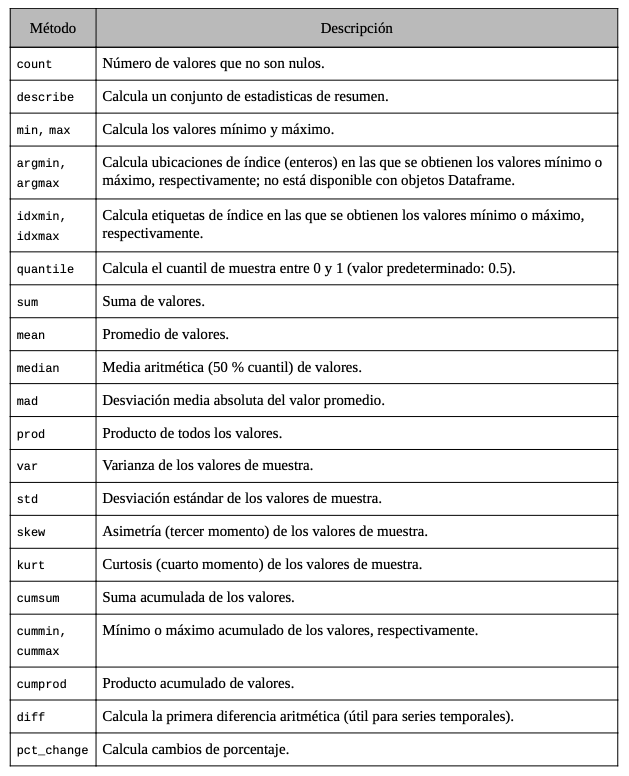

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/jamc88/Analisis-datos-atmosfericos/refs/heads/main/datos/rama_2023_05.csv")

In [3]:
df.head()

,fecha,CO,NO,NO2,NOX,O3,PM10,PM25,SO2
0,2015-01-01,1.050696,22.765528,24.225155,46.987578,23.175150,105.573684,78.953405,11.554723
1,2015-01-02,0.807585,32.249608,21.554160,53.800628,17.268366,36.687845,15.449438,1.895052
2,2015-01-03,0.640755,21.686916,19.394081,41.071651,15.486486,29.269022,12.915129,1.436937
3,2015-01-04,0.726940,24.606272,19.560976,44.165505,17.329032,39.961538,16.838284,1.809061
4,2015-01-05,0.530815,11.443182,20.990260,32.439935,14.470588,31.855643,12.667774,8.315789


In [4]:
df.tail()

,fecha,CO,NO,NO2,NOX,O3,PM10,PM25,SO2
3068,2023-05-27,0.256722,3.750583,17.284351,21.629371,41.580645,36.774011,21.170139,2.735683
3069,2023-05-28,0.286826,3.458886,16.349241,20.230769,36.913761,28.580000,18.454861,2.331658
3070,2023-05-29,0.482077,11.448113,24.521154,36.436321,29.697068,30.241486,16.692857,1.071588
3071,2023-05-30,0.441455,13.893519,22.615530,37.224537,36.185971,35.859532,20.888525,1.181818
3072,2023-05-31,0.340404,5.353066,19.372583,25.710359,47.860972,42.203390,24.787097,1.402083


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3073 entries, 0 to 3072
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   fecha   3073 non-null   object 
 1   CO      3073 non-null   float64
 2   NO      3073 non-null   float64
 3   NO2     3073 non-null   float64
 4   NOX     3073 non-null   float64
 5   O3      3073 non-null   float64
 6   PM10    3073 non-null   float64
 7   PM25    3073 non-null   float64
 8   SO2     3073 non-null   float64
dtypes: float64(8), object(1)
memory usage: 216.2+ KB


## Estadísticos Básicos

* La **media aritmética (o promedio)** de una muestra de $n$ mediciones  es igual a la suma de las mediciones dividida entre $n$.

$$
\overline{x}=\frac{1}{n}\sum_{i=1}^n x_i
$$

* La **mediana m**  de un conjunto de $n$ mediciones es el valor de $x$ que cae en la posición media cuando las mediciones son ordenadas de menor a mayor.

* La **varianza** de una muestra de $n$ mediciones es la suma de las desviaciones cuadradas de las mediciones alrededor la media $\overline{x}$ dividida entre $(n-1)$.  La varianza muestral se denota con $s^2$ y está dada por:
$$
s^2 = \frac{\sum_{i=1}^n (x_i-\overline{x})^2}{n-1}
$$

* La **desviación estándar** de un conjunto de mediciones es igual a la raíz cuadrada positiva de la varianza.

### 2. Calcular la media, mediana, varianza y desviación estándar para el CO

In [6]:
from itertools import count
MEDIA=sum(df['CO'])/3073
MED=df['CO'].mean()
Md=df['CO'].median()
var=df['CO'].var()
de=(var)**1/2
#mediana=mediana(df['CO'])
print("      media:",MED,"         mediana:",Md,"    varianza:",var,"      Desviación estándar:",de)

      media: 0.4819260524259833          mediana: 0.4440325497287523     varianza: 0.04209907680387132       Desviación estándar: 0.02104953840193566


![est.png](attachment:est.png)

## Resumen de 5 numeros

El resumen de cinco números de un conjunto de datos consta del número más pequeño ($Min$), el cuartil inferior ($Q_1$), la mediana ($Q_2$), el cuartil superior ($Q_3$), y el número más grande ($Máx$), presentados en orden de menor a mayor.

![cuart.png](attachment:cuart.png)

Los cuantiles son puntos que dividen un conjunto de datos ordenados en partes iguales. De modo que un cuantil indica el valor por debajo del cual se encuentra un porcentaje de datos.

Por ejemplo, si el valor del cuantil de orden 0,39 es 24, significa que el 39% de los datos de la muestra son menores que 24 y que el resto de datos son mayores que 24.

Los cuartiles, que dividen a la distribución en cuatro partes (corresponden a los cuantiles 0,25; 0,50 y 0,75);

### 2. Obtenga un resumen de 5 numeros para el ozono.

In [7]:
df['O3'].quantile([.25, .50, .75])

,O3
0.25,23.923077
0.50,29.838384
0.75,36.216012


In [8]:
df['O3'].min()


3.2260536398467434

In [9]:
df['O3'].max()


67.44375

In [10]:
df['O3'].describe()


,O3
count,3073.000000
mean,30.486331
std,9.023384
min,3.226054
25%,23.923077
50%,29.838384
75%,36.216012
max,67.443750


In [11]:
df.describe()

,CO,NO,NO2,NOX,O3,PM10,PM25,SO2
count,3073.000000,3073.000000,3073.000000,3073.000000,3073.000000,3073.000000,3073.000000,3073.000000
mean,0.481926,14.712425,23.030057,37.996908,30.486331,41.892833,21.327371,3.689885
std,0.205181,8.857507,6.754973,14.795599,9.023384,16.047342,8.796122,3.490277
min,0.115917,1.168000,8.061630,9.983402,3.226054,8.218487,2.849315,0.630435
25%,0.327215,8.018735,18.188498,26.938073,23.923077,29.483986,15.344720,1.557047
50%,0.444033,12.669596,22.421517,35.880223,29.838384,40.040856,20.550000,2.484034
75%,0.597009,19.386091,26.854167,46.739777,36.216012,52.708716,26.212963,4.377049
max,1.831818,75.806548,72.193452,148.005952,67.443750,115.334071,86.909910,31.461741


## Gráfica de caja

![caja.png](attachment:caja.png)


Rango intercuartil $(IQR)$: $IQR=Q_3-Q_1$

Límite inferior: $Q_1 - 1.5(IQR)$

Límite superior: $Q_3 + 1.5(IQR)$

Un **valor atípico** (outlier) es una observación que es numéricamente distante del resto de los datos.

### 3. Obtenga una gráfica de caja para el dióxido de nitrógeno (NO2).

Estas son las partes básicas de un diagrama de caja:

*   La línea central de la caja indica la mediana de los datos. Una mitad de los datos está por debajo de este valor, y la otra por encima. Si los datos son simétricos, la mediana estará en el centro de la caja. Si los datos están sesgados, la mediana estará más cerca de la parte superior o inferior de la caja.

*   Los extremos de arriba y abajo de la caja indican los cuantiles, o percentiles, 25 y 75. Estos dos cuantiles también se conocen como cuartiles, porque separan cuartos (25 %) de los datos. La longitud de la caja es la diferencia entre estos dos percentiles y se conoce como rango intercuartílico (IQR).

*   Las líneas que se extienden desde la caja se llaman bigotes. Los bigotes representan la varianza esperada de los datos. Estos bigotes se extienden 1,5 veces el IQR desde los extremos superior e inferior de la caja. Si los datos no llegan hasta el final de los bigotes, estos se ajustan a los valores mínimo y máximo de los datos. Si hay datos que queden por encima o por debajo de los extremos de los bigotes, se los representa con puntos. Estos puntos se conocen como valores atípicos. Un valor atípico es el que supera la varianza esperada. Merece la pena revisar estos puntos de datos para aclarar si son atípicos o erróneos. Los bigotes no incluyen dichos valores.




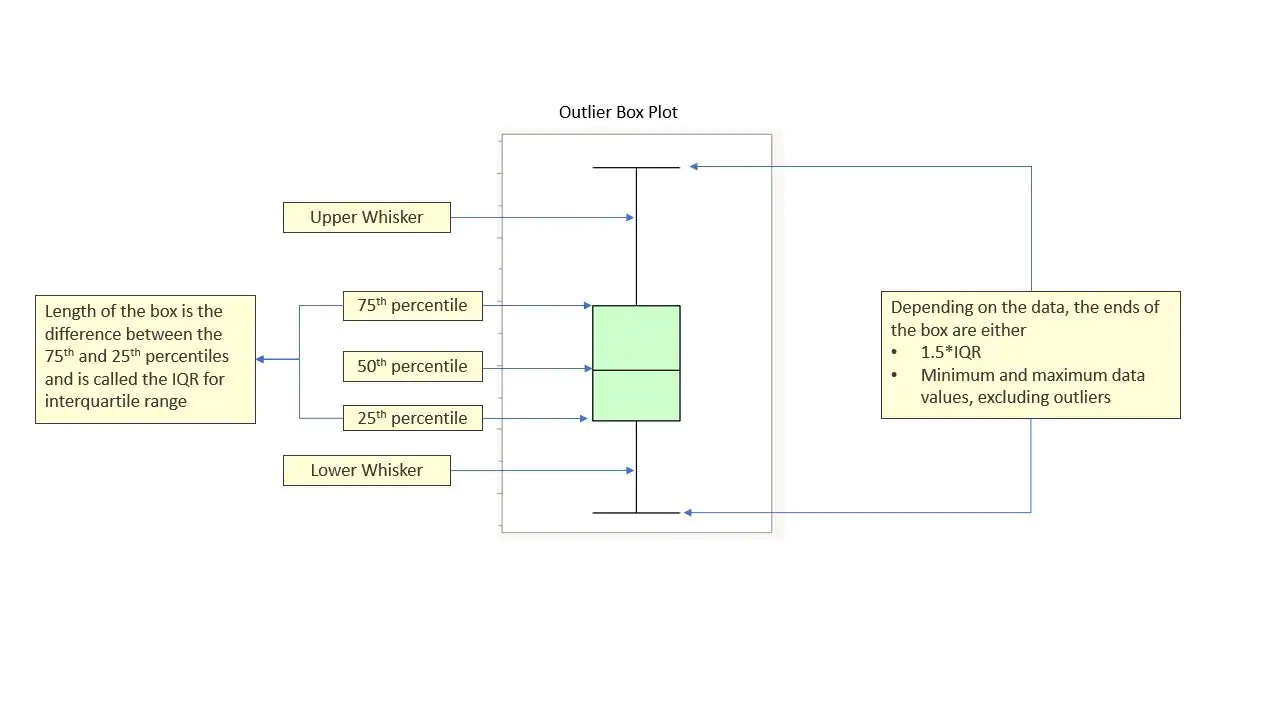

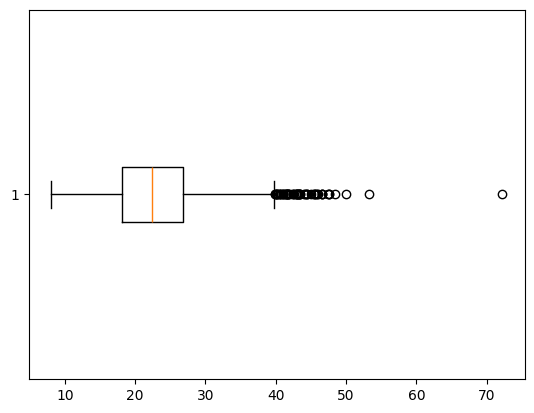

In [12]:
plt.boxplot(df['NO2'],vert = False)
plt.show()
#plt.boxplot(df['NO2'],vert = False)

#vert = False  para la  grafica en horizontal

### 4. Obtenga las graficas de caja de las partículas PM10 y PM25.

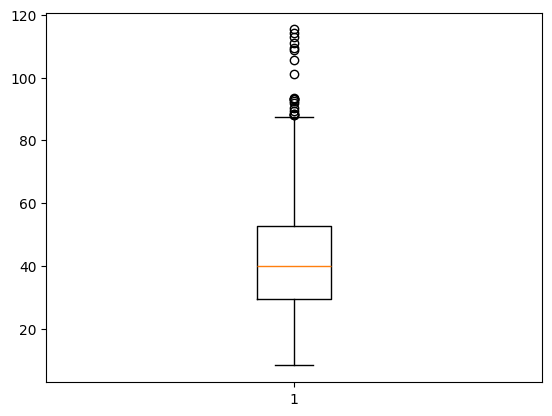

In [13]:
plt.boxplot(df['PM10'])
plt.show()

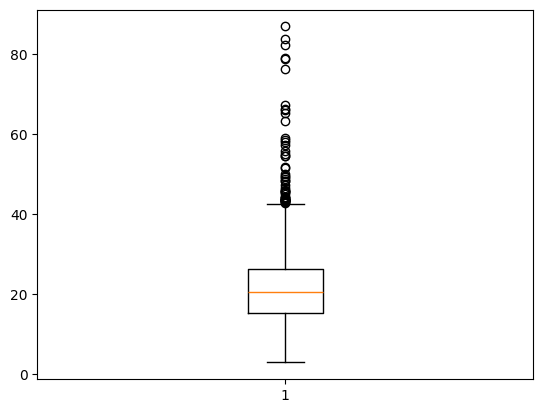

In [14]:
plt.boxplot(df['PM25'])
plt.show()

In [15]:
import seaborn as sns

In [16]:
df[['PM10','PM25']]

,PM10,PM25
0,105.573684,78.953405
1,36.687845,15.449438
2,29.269022,12.915129
3,39.961538,16.838284
4,31.855643,12.667774
...,...,...
3068,36.774011,21.170139
3069,28.580000,18.454861
3070,30.241486,16.692857
3071,35.859532,20.888525


<Axes: >

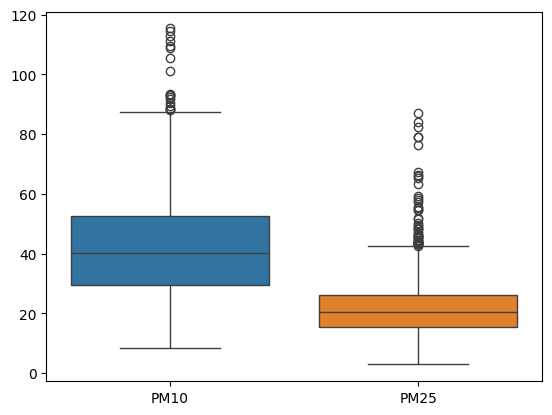

In [17]:
sns.boxplot(data=df[['PM10','PM25']])

<Axes: >

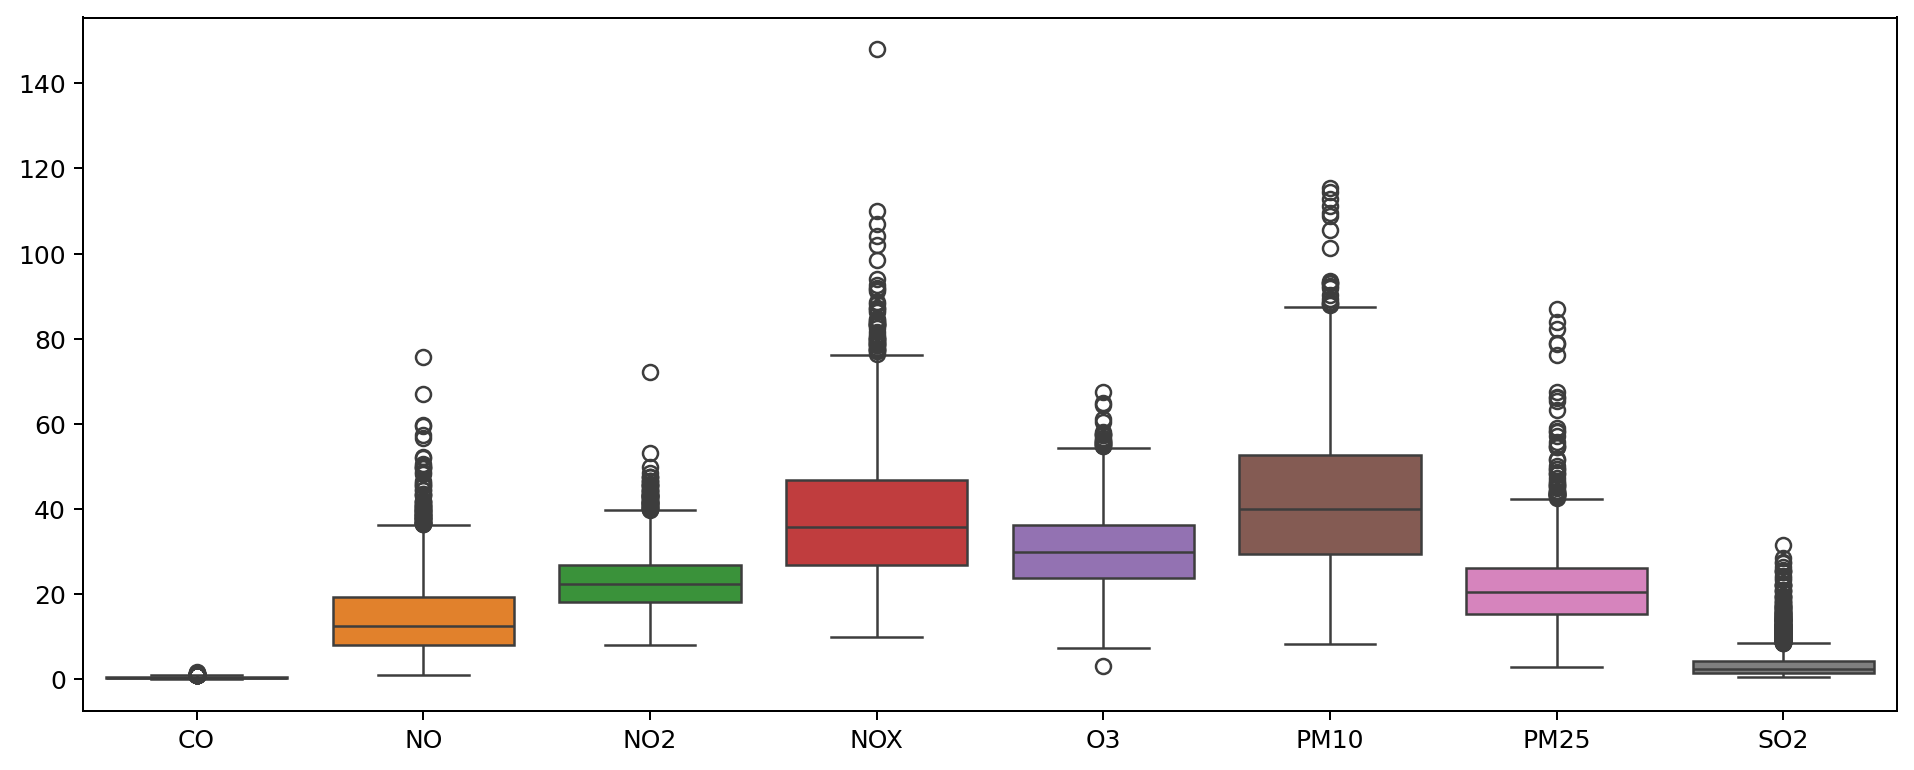

In [18]:
plt.figure(figsize=(13,5),dpi=180)
sns.boxplot(data=df)

### 5. Obtenga las graficas de caja de todos los contaminantes.

In [19]:
import seaborn as sns

<Figure size 1500x750 with 0 Axes>

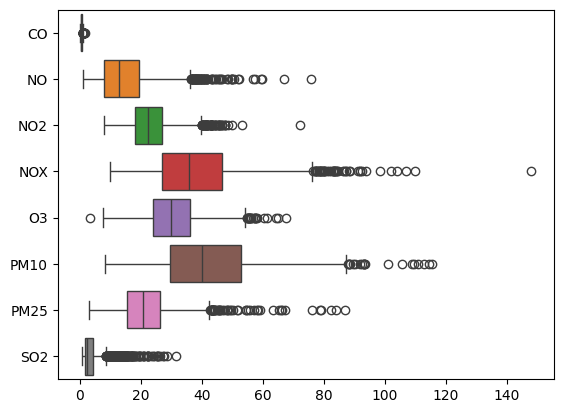

<Figure size 1500x750 with 0 Axes>

In [20]:
sns.boxplot(data=df,orient='h')

# orient='h'
plt.figure(figsize=(10,5), dpi=150)

¿Cuantos datos atípicos tienen los óxidos de nitrógeno?

In [21]:
df['NO2'].describe()

,NO2
count,3073.000000
mean,23.030057
std,6.754973
min,8.061630
25%,18.188498
50%,22.421517
75%,26.854167
max,72.193452


In [81]:
def buscar_valores_atipicos_IQR( elemento):
    # Calculando los percentiles Q1 y Q3 para el elemento
    q1 = df[elemento].quantile(0.25)
    q3 = df[elemento].quantile(0.75)

    # Calculando el rango intercuartil (IQR)
    IQR = q3 - q1

    # Calculando los límites inferior y superior para los valores atípicos
    limite_inferior = q1 - 1.5 * IQR
    limite_superior = q3 + 1.5 * IQR

    # Filtrando los valores atípicos para el elemento específico
    valores_atipicos = df[(df[elemento] < limite_inferior) | (df[elemento] > limite_superior)]

    # Contando el número de valores atípicos
    num_valores_atipicos = valores_atipicos[elemento].count()

    # Filtrando las fechas de los valores atípicos
    fechas_atipicas = valores_atipicos[['fecha', elemento]]


    # Imprimir el número total de valores atípicos en la columna
    print(f"\nNúmero total de valores atípicos en la columna '{elemento}': {num_valores_atipicos}")

    """ Si hay valores atípicos, mostramos la tabla con las fechas y los valores atípicos
    if num_valores_atipicos > 0:
        print(f"\nFechas y valores atípicos para '{elemento}':" ,num_valores_atipicos )
        # Usamos el método .to_string() para mostrar la tabla sin índices
        #print(fechas_atipicas.to_string(index=False))
    else:
        print(f"No se encontraron valores atípicos en la columna '{elemento}'.")"""

    return  fechas_atipicas



¿En qué fechas se registraron estos datos atípicos?


In [84]:
buscar_valores_atipicos_IQR('NO2')


Número total de valores atípicos en la columna 'NO2': 59


,fecha,NO2
12,2015-01-13,41.313559
326,2015-11-23,41.055416
333,2015-11-30,46.649718
334,2015-12-01,49.959036
335,2015-12-02,41.537915
342,2015-12-09,40.176471
343,2015-12-10,45.414868
344,2015-12-11,45.605140
352,2015-12-19,44.979118
353,2015-12-20,39.955711


In [37]:
IQR=46.739-26.938
(df['NOX']>46.739+1.5*(IQR)).sum()

50

In [38]:
50/3073*100

1.6270745200130166

In [39]:
df[['fecha','NOX']][df['NOX']>46.739+1.5*(IQR)] #DATOS ATIPICOS

,fecha,NOX
300,2015-10-28,83.483333
333,2015-11-30,87.296610
334,2015-12-01,98.563855
335,2015-12-02,83.168246
342,2015-12-09,84.654118
343,2015-12-10,86.292566
344,2015-12-11,91.745327
349,2015-12-16,78.567696
354,2015-12-21,80.957647
356,2015-12-23,102.088167


## Gráficas de los contaminantes

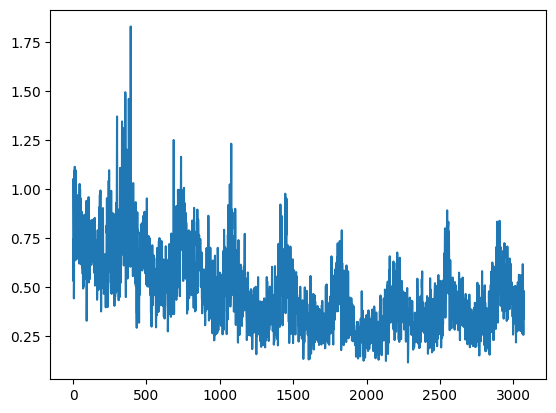

In [85]:
fig, ax = plt.subplots()
ax.plot(df['CO']);

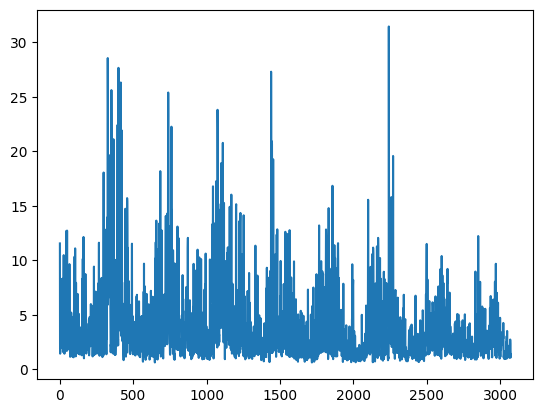

In [86]:
fig, ax = plt.subplots()
ax.plot(df['SO2']);

## Serie temporal

Llamaremos **serie temporal ó serie de tiempo** a una colección de $n$ datos $\{ x_t\}_{t\leq n }$ indexados por un tiempo $t$, es decir, ordenados cronológicamente.  La  indexación $t$ de una serie temporal debe ser en intervalos de una misma longitud, tales como anual, mensual, semanal, diaria, por hora, etc.

In [87]:
df.index

RangeIndex(start=0, stop=3073, step=1)

*pd.to_datetime( )* se utiliza para convertir diferentes tipos de datos en objetos de fecha.

*.index( )* se utiliza para asignar una lista, serie u otro dataframe como el índice de un dataframe.

In [88]:
df['fecha'] = pd.to_datetime(df['fecha']) #fechas ,serie de tiempo

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3073 entries, 0 to 3072
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   fecha   3073 non-null   datetime64[ns]
 1   CO      3073 non-null   float64       
 2   NO      3073 non-null   float64       
 3   NO2     3073 non-null   float64       
 4   NOX     3073 non-null   float64       
 5   O3      3073 non-null   float64       
 6   PM10    3073 non-null   float64       
 7   PM25    3073 non-null   float64       
 8   SO2     3073 non-null   float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 216.2 KB


In [90]:
df=df.set_index('fecha') #asigna lista, indice de df

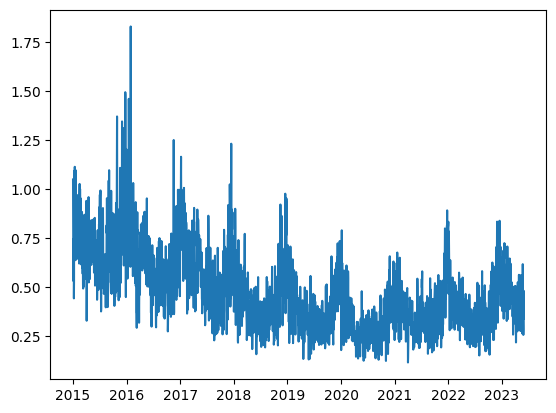

In [91]:
fig, ax = plt.subplots()
ax.plot(df['CO']);

In [92]:
df['CO']['2018-05':'2020-11-03']

,CO
fecha,
2018-05-01,0.248947
2018-05-02,0.451852
2018-05-03,0.425682
2018-05-04,0.457273
2018-05-05,0.239732
...,...
2020-10-30,0.242394
2020-10-31,0.337376
2020-11-01,0.243000


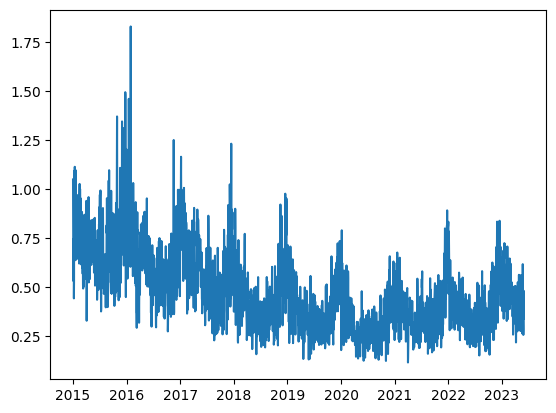

In [93]:
fig, ax = plt.subplots()
ax.plot(df['CO']);

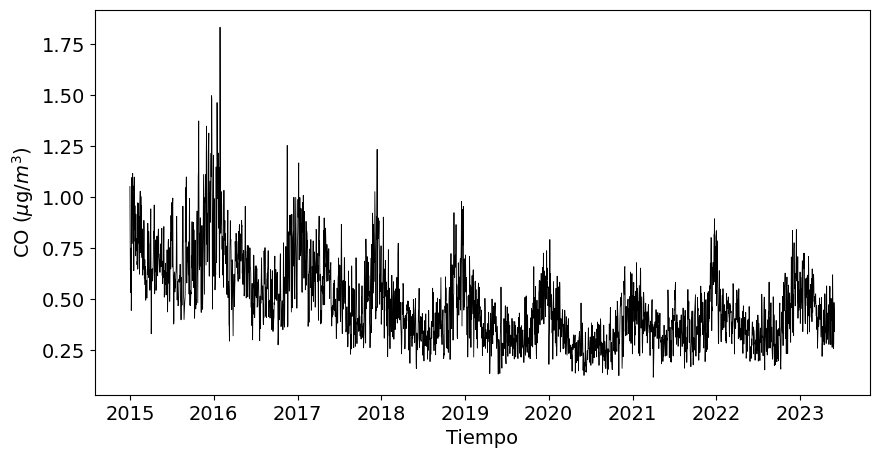

In [94]:
fig, ax = plt.subplots(figsize=(10,5),dpi=100)
ax.plot(df['CO'], color='black',lw=0.6);
ax.tick_params(labelsize=14)
ax.set_xlabel('Tiempo', fontdict = {'fontsize':14 })
ax.set_ylabel('CO ($\mu$g/$m^3$)', fontdict = {'fontsize':14 });
#ax.grid(True)

Realice las gráficas de 2 contaminantes

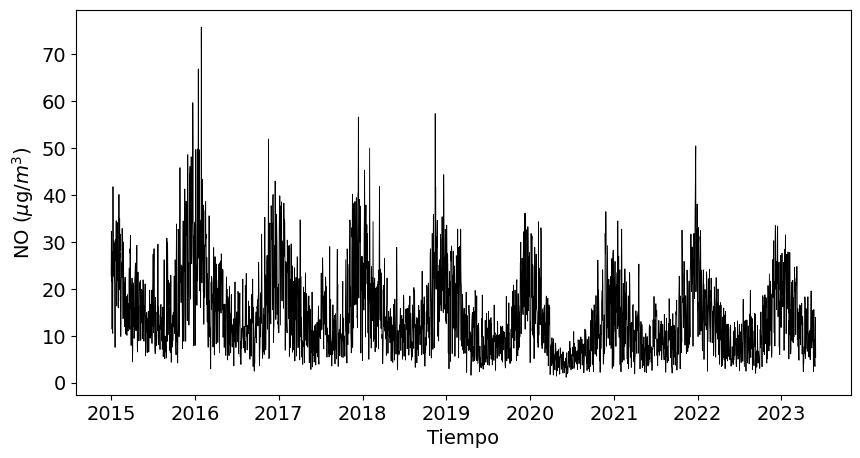

In [95]:
fig, ax = plt.subplots(figsize=(10,5),dpi=100)
ax.plot(df['NO'], color='black',lw=0.6);
ax.tick_params(labelsize=14)
ax.set_xlabel('Tiempo', fontdict = {'fontsize':14 })
ax.set_ylabel('NO ($\mu$g/$m^3$)', fontdict = {'fontsize':14 });
#ax.grid(True)

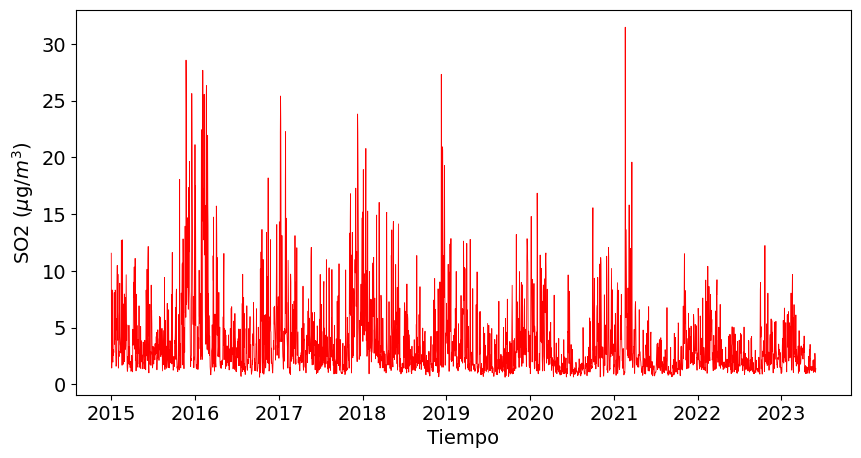

In [97]:
fig, ax = plt.subplots(figsize=(10,5),dpi=100)
ax.plot(df['SO2'], color='RED',lw=0.6);
ax.tick_params(labelsize=14)
ax.set_xlabel('Tiempo', fontdict = {'fontsize':14 })
ax.set_ylabel('SO2 ($\mu$g/$m^3$)', fontdict = {'fontsize':14 });
#ax.grid(True)

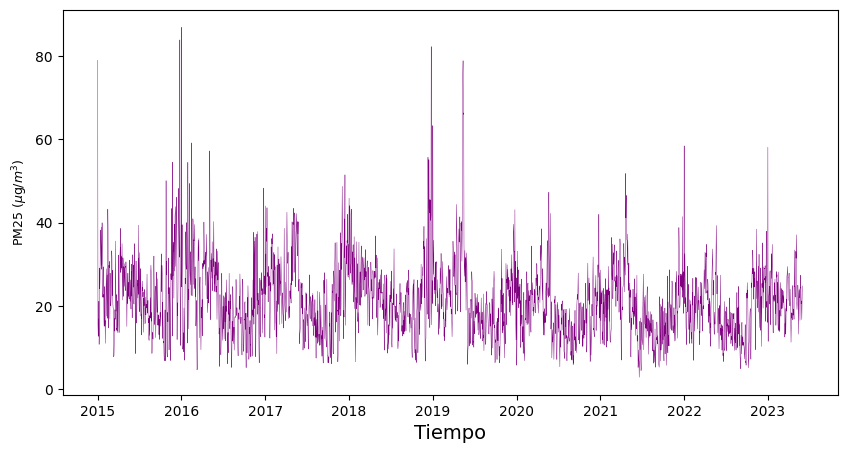

In [103]:
fig, ax = plt.subplots(figsize=(10,5),dpi=100)
ax.plot(df['PM25'], color='PURPLE',lw=0.3);
ax.tick_params(labelsize=10)
ax.set_xlabel('Tiempo', fontdict = {'fontsize':14 })
ax.set_ylabel('PM25 ($\mu$g/$m^3$)', fontdict = {'fontsize':9 });

La OMS estableció un nivel recomendado de 25 $\mu$g/$m^3$ (media de 24 horas) para las concentraciones de PM$_{2.5}$. ¿En qué dias se rebasó el nivel recomendado en 2022?

In [104]:
df['PM25']['2022-01-01':'2022-12-31'][df['PM25']>25]

,PM25
fecha,
2022-01-01,58.414835
2022-01-03,28.670588
2022-01-04,32.527687
2022-01-05,27.703125
2022-01-06,25.186747
...,...
2022-12-20,29.639394
2022-12-22,27.008523
2022-12-23,25.591549


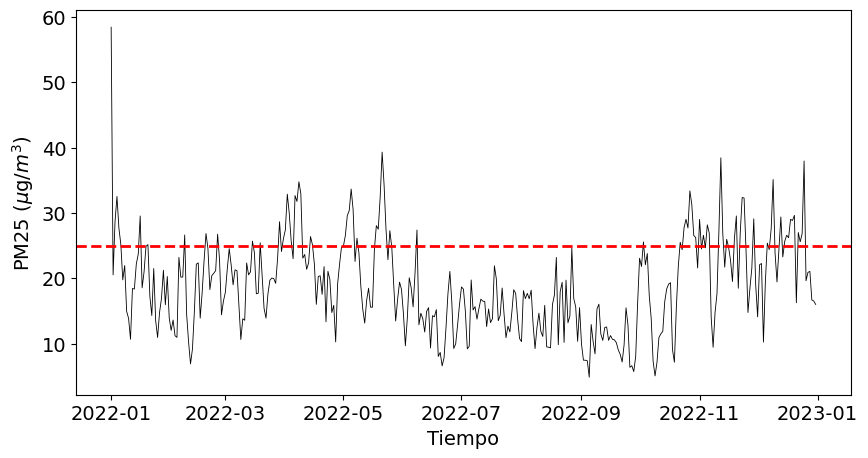

In [105]:
fig, ax = plt.subplots(figsize=(10,5),dpi=100)
ax.plot(df['PM25']['2022-01-01':'2022-12-31'], color='black',lw=0.6);
ax.tick_params(labelsize=14)
ax.set_xlabel('Tiempo', fontdict = {'fontsize':14 })
ax.set_ylabel('PM25 ($\mu$g/$m^3$)', fontdict = {'fontsize':14 });
ax.axhline(25,color='red',lw=2,linestyle='--')
plt.show()

## Coeficiente de asimetría de Fisher

El coeficiente de asimetría de Fisher es un coeficiente que permite calcular la asimetría de una distribución. Es decir, el coeficiente de asimetría sirve para determinar si una función es asimétrica positiva, asimétrica negativa o simétrica. Dada una muestra $\{x_1,x_2,...,x_n \}$,  la fórmula del coeficiente de asimetría de Fisher es:

\begin{equation*}
\gamma_1=\frac{\sum_{i=1}^n (x_i-\overline{x})^3}{n s^3}.
\end{equation*}



Donde, $\overline{x}$ y $s$ son la media y desviación estandar muestrales.


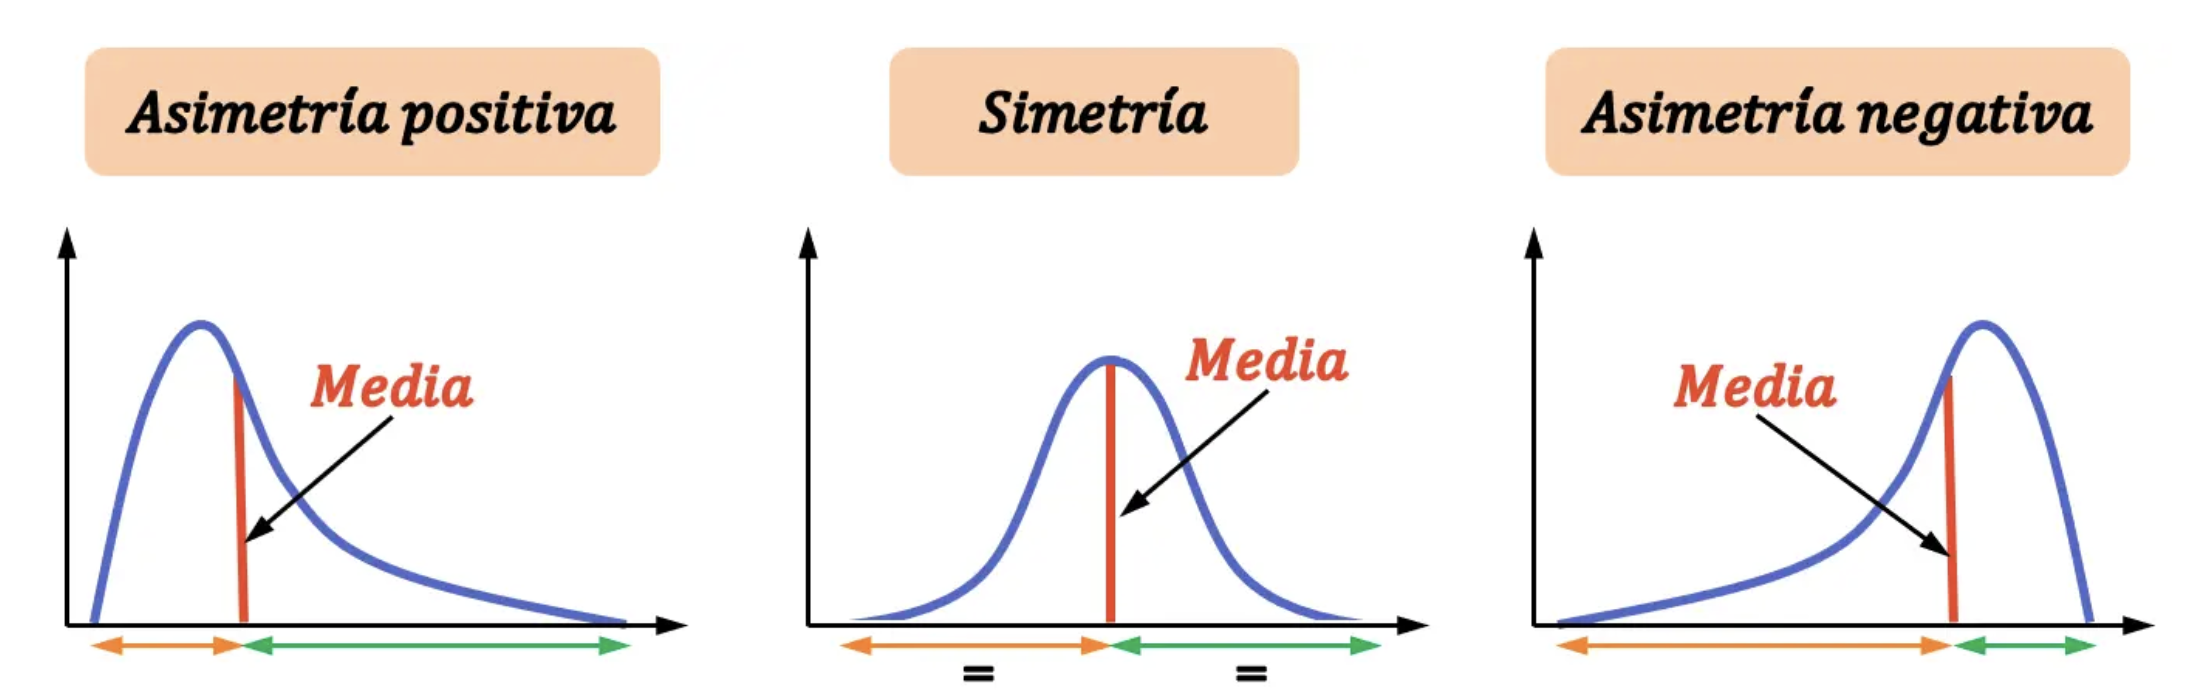![asim.png](attachment:asim.png)

* Si $\gamma_1>0$, la distribución es asimétrica positiva.


* Si $\gamma_1<0$, la distribución es asimétrica negativa.

In [106]:
df.skew()

,0
CO,1.063310
NO,1.265967
NO2,0.773803
NOX,0.977845
O3,0.374217
PM10,0.559250
PM25,1.302965
SO2,2.802113


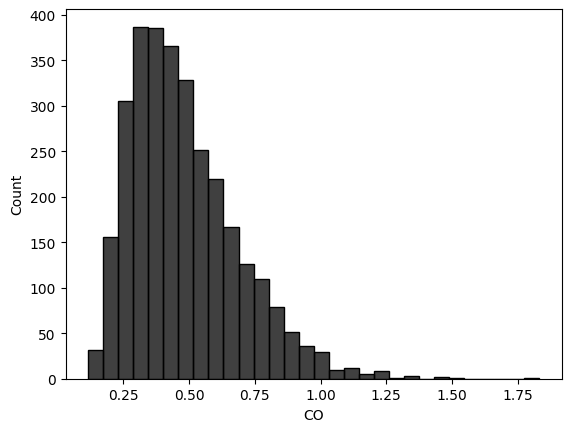

In [109]:
sns.histplot(df['CO'], bins=30, color='BLACK')
plt.show()

La **curtosis (Kurtosis)** define en qué  grado las colas de la distribución difieren de las colas de una distribución normal.  Dada una muestra $\{x_1,x_2,...,x_n \}$,  el coeficiente de curtosis  se define como:

\begin{equation*}
\beta_2=\frac{\sum_{i=1}^n (x_i-\overline{x})^4}{n s^4}.
\end{equation*}

Donde, $\overline{x}$ y $s$ son la media y desviación estandar muestrales.


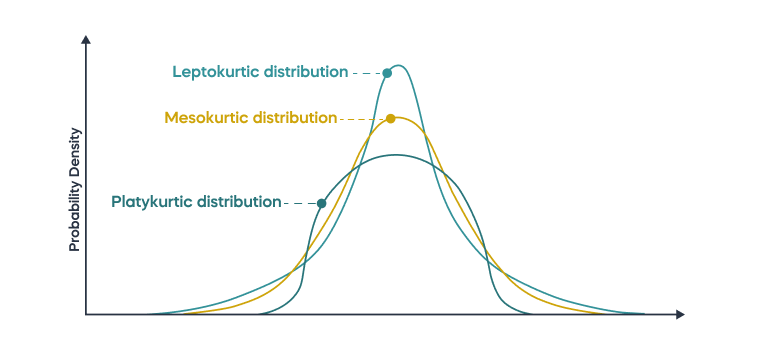

* Si $\beta_2>0$,  la distribución es leptocúrtica (distribución con colas más largas que la normal).


* Si $\beta_2=0$, la distribución es mesocúrtica (cuando tiene una distribución normal o su misma curtosis).


* Si $\beta_2<0$, la distribución es platicúrtica (distribución con colas menos largas que la normal.).

In [ ]:
df.kurt()